In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

#to amplify the dna seq with mutation probablity. passing the sequence and the rate 
def pcr_amplification(seq, meu):    
    replicate =''
    nucleotides = ['A', 'G', 'C', 'T']
    for i in seq:
        
        # This makes it so that if i == G, options would be ['A', 'C', 'T', 'G'] <-- G is last
        options = list(filter(lambda x: x != i, nucleotides))
        options.append(i)
        # Choose from ['A', 'C', 'T', 'G'] randomnly where 'G' has a 1-meu probability 
        # Every other base has equal probability
        base = np.random.choice(options, p = [meu/3, meu/3, meu/3, 1-meu])
        replicate = replicate + base
    
    #returns the replicated sequence
    return replicate


#to calculate the sequences that are similar and distinct 
def similar_seq(amplified_seq):
    count_same = count_unique = 0
    distinct_seq = []
    for i in amplified_seq:
    
        if i == original_seq:
            count_same += 1;
        elif i != original_seq:
            distinct_seq.append(i)
    #print( original_seq ,':', count_same)      
     
    #to calculate the frequency of each distinct sequence 
    def relative_abundace(distinct_seq):
        #dictioanry to store distinct sequences with their occurence frequecnies 
        dist_abundance = {}
        
        keys = values = 0
        #counting the distribution abundance for each different sequence for each rate 
        for i in distinct_seq:
            if i in dist_abundance:
                dist_abundance[i] += 1
            else:
                dist_abundance[i] = 1
        
        keys = list(dist_abundance.keys())
        values = list(dist_abundance.values())
        
        #plotting bar plot for each rate
        
        for j in range(0,3):
            plt.bar( i, len(keys), edgecolor = 'black', hatch = '.');
            
            plt.text(x = i, y = len(keys), s =  str(len(keys)), size = 15 )
        
        
        #nested function for calculating simpsons index 
        def simpsons_index_and_entropy(dist_abundance):
            sumation_number = si = total_num_of_individual= sumation_for_entropy= 0
            
            #total number of individuals for all the species together 
            total_num_of_individual = sum(dist_abundance.values()) * (sum(dist_abundance.values()) - 1)
            
            #accessing species(keys) and number(values)
            for species, number in dist_abundance.items():
                
                #summing up all the values-1 and executing E(n(n-1))
                sumation_number = sumation_number + (number * (number - 1 ))
                
                #pi = number of sequences for each different sequence basically the frequency for each/8192(total after 13 cycles)
                sumation_for_entropy = sumation_for_entropy + ((number/8192) * np.log((number/8192)))
                 
            si = 1 - (sumation_number/ total_num_of_individual)
            print("Simpsons index for mutation rate of ", each_rate,'is : ', "{:.5f}".format(si))
            print('Entropy for mutation rate', each_rate, 'is', "{:.5f}".format(sumation_for_entropy * (-1)))
            
        simpsons_index_and_entropy (dist_abundance)  #calling simpsons index function by passing the dicitionary 
    relative_abundace(distinct_seq) #calling relative_abundance function

Simpsons index for mutation rate of  0.001 is :  0.99788
Entropy for mutation rate 0.001 is 6.33484
Simpsons index for mutation rate of  0.01 is :  0.99985
Entropy for mutation rate 0.01 is 8.39356
Simpsons index for mutation rate of  0.1 is :  1.00000
Entropy for mutation rate 0.1 is 9.00871


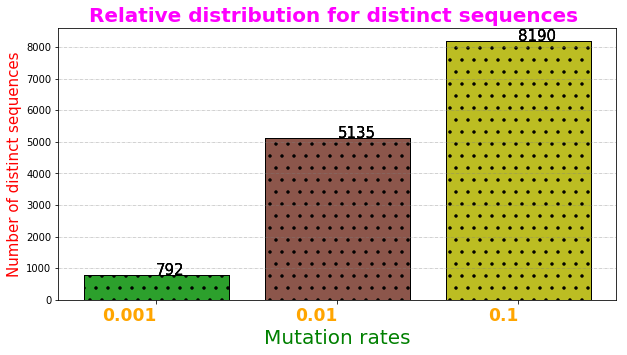

In [42]:
original_seq = ''

#for the final part where it contains all sequences for all three rates 
total_seq = replicated_seq= []

#creating the original sequence 
# random.choice has an option to specify the number of random letters to get, i.e. the length
original_seq = random.choices(('A', 'T', 'G', 'C'), k=100)

#each of the mutation rates 
rate = [0.001, 0.01, 0.1]

#will use this to store everytime a sequence is amplified and carry the next amplification using this replciated sequence 
temp_seq = original_seq

plt.figure(figsize = (10,5))

#for each of the mutation rates
for each_rate in rate:
    amplified_seq = []
    
    #for running 13 cycles with each cycles doubling the number 
    for x in (2**power for power in range(1, 13)):
        
        #for iterating through each cycle
        for j in range(1, x+1):
            
            #after doing aplification storeing the sequence just created in store_seq
            store_seq = pcr_amplification(temp_seq, each_rate)
            
            #adding the replicated sequence to a list
            replicated_seq.append(store_seq)
            
            #using the just created sequence for next cycle by replacing the temp_seq that has original seq initally
            #then passing through the pcr_amplification function
            temp_seq = store_seq
            
            #storing the amplifies sequence after each cycle 
            amplified_seq.append(store_seq)
    
    
    
    #displays idential seuqneces with distinct seqeunce with theier frequencies
    similar_seq(amplified_seq)
    
#plotting and adding aesthtics for better comprehension
plt.xticks(np.arange(len(rate)), rate, color='orange', fontweight='bold', fontsize='17', horizontalalignment='right')
plt.xlabel("Mutation rates", fontsize = 20, color = 'green')
plt.ylabel("Number of distinct sequences", fontsize = 15, color = 'red')
plt.title("Relative distribution for distinct sequences ", fontsize = 20, fontweight = 'bold', color = 'magenta')
plt.grid(b = True, axis = 'y', color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.7)    
    
    